In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# For future use - incorporate Japanese into plot
# ! apt-get install fonts-takao-mincho fonts-takao-gothic fonts-takao-pgothic

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Path = '/content/drive/MyDrive/Colab Notebooks/google_trends'
filelist = os.listdir(Path)

In [81]:
# Create a long-form dataframe with the trends for the Top 10 searches
df = pd.DataFrame()
for sheet in range(10):
    column_name = pd.read_csv(f'{Path}/{filelist[sheet]}').values[0]
    temp_df = pd.read_csv(f'{Path}/{filelist[sheet]}')
    temp_df['trend'] = [column_name] * 50
    df = pd.concat([df, temp_df])

In [83]:
# Replace Japanese with English
# First, clean up the English filenames
trend_list = [x.replace('_', ' ') for x in filelist]
trend_list = [x.replace('.csv','') for x in trend_list]
trend_list = [x[2::] for x in trend_list]
trend_list

# Create a dictionary pairing each Japanese word with its English translation
translation = {
    '小山田 圭吾: (Japan)': 'Keigo Oyamada',
    '夏目 三 久: (Japan)': 'Natsume Miku',
    '小松菜 奈: (Japan)': 'Nana Komatsu',
    'コロナ ワクチン: (Japan)': 'New coronavirus vaccine',
    'モンハン ライズ: (Japan)': 'Monster Hunter Rise',
    '呪術 廻 戦: (Japan)': 'Jujutsu Kaisen',
    'オリンピック: (Japan)': 'Tokyo 2020 Olympics',
    '東京リベンジャー ズ: (Japan)': 'Tokyo Revengers',
    'ウマ 娘: (Japan)': 'Uma Musume Pretty Derby',
    '大谷 翔平: (Japan)': 'Shohei Ohtani'
}

j_translation = {
    'Keigo Oyamada': '小山田 圭吾',
    'Natsume Miku': '夏目 三 久',
    'Nana Komatsu': '小松菜 奈' ,
    'New coronavirus vaccine': 'コロナ ワクチン',
    'Monster Hunter Rise': 'モンハン ライズ',
    'Jujutsu Kaisen': '呪術 廻 戦',
    'Tokyo 2020 Olympics': 'オリンピック',
    'Tokyo Revengers': '東京リベンジャー ズ',
    'Uma Musume Pretty Derby': 'ウマ 娘',
    'Shohei Ohtani': '大谷 翔平'
}

# Replace values
df['trend'] = df['trend'].replace(translation)
df['japanese'] = df['trend'].replace(j_translation)

In [84]:
# Used to sort trends in descending order (from most popular to least popular)
rank_dict = {
    'Keigo Oyamada': 10,
    'Natsume Miku': 9,
    'Nana Komatsu': 8,
    'New coronavirus vaccine': 7,
    'Monster Hunter Rise': 4,
    'Jujutsu Kaisen': 5,
    'Tokyo 2020 Olympics': 1,
    'Tokyo Revengers': 3,
    'Uma Musume Pretty Derby': 6,
    'Shohei Ohtani': 2
}
df['rank'] = df['trend'].replace(rank_dict)

In [88]:
# Add categories
cat_dict = {
    'Keigo Oyamada': 'celebrity',
    'Natsume Miku': 'celebrity',
    'Nana Komatsu': 'celebrity',
    'New coronavirus vaccine': 'health',
    'Monster Hunter Rise': 'anime',
    'Jujutsu Kaisen': 'anime',
    'Tokyo 2020 Olympics': 'sports',
    'Tokyo Revengers': 'anime',
    'Uma Musume Pretty Derby': 'anime',
    'Shohei Ohtani': 'sports'
}
df['category'] = df['trend'].replace(cat_dict)

In [ ]:
# Clean up data and add columns necessary for visualization
df = df.drop('Week', axis=0)
df['time'] = pd.to_datetime(df.index)
df['value'] = df['Category: All categories']
df = df.drop('Category: All categories', axis=1)
df['value'] = df['value'].apply(lambda x: int(x.replace('<1', '0')))
df = df.sort_values(by=['rank', 'time'], ascending=[True, True])

In [90]:
df.head()

,trend,japanese,rank,category,time,value
2021-01-03,Tokyo 2020 Olympics,オリンピック,1,sports,2021-01-03,1
2021-01-10,Tokyo 2020 Olympics,オリンピック,1,sports,2021-01-10,1
2021-01-17,Tokyo 2020 Olympics,オリンピック,1,sports,2021-01-17,1
2021-01-24,Tokyo 2020 Olympics,オリンピック,1,sports,2021-01-24,1
2021-01-31,Tokyo 2020 Olympics,オリンピック,1,sports,2021-01-31,1


In [91]:
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# plt.rcParams['font.family'] = 'TakaoPGothic'
pal = {
    'celebrity': '#00A1F1',
    'health': '#7CBB00',
    'anime': '#FFBB00',
    'sports': '#F63514'
}

In [247]:
# Used to generate plot subtitles
subtitle_dict = {
    1: 'Tokyo 2020 Olympics',
    2: 'Shohei Ohtani',
    3: 'Tokyo Revengers',
    4: 'Monster Hunter Rise',
    5: 'Jujutsu Kaisen',
    6: 'Uma Musume\nPretty Derby',
    7: 'New coronavirus\nvaccine',
    8: 'Nana Komatsu',
    9: 'Natsume Miku',
    10: 'Keigo Oyamada'
}

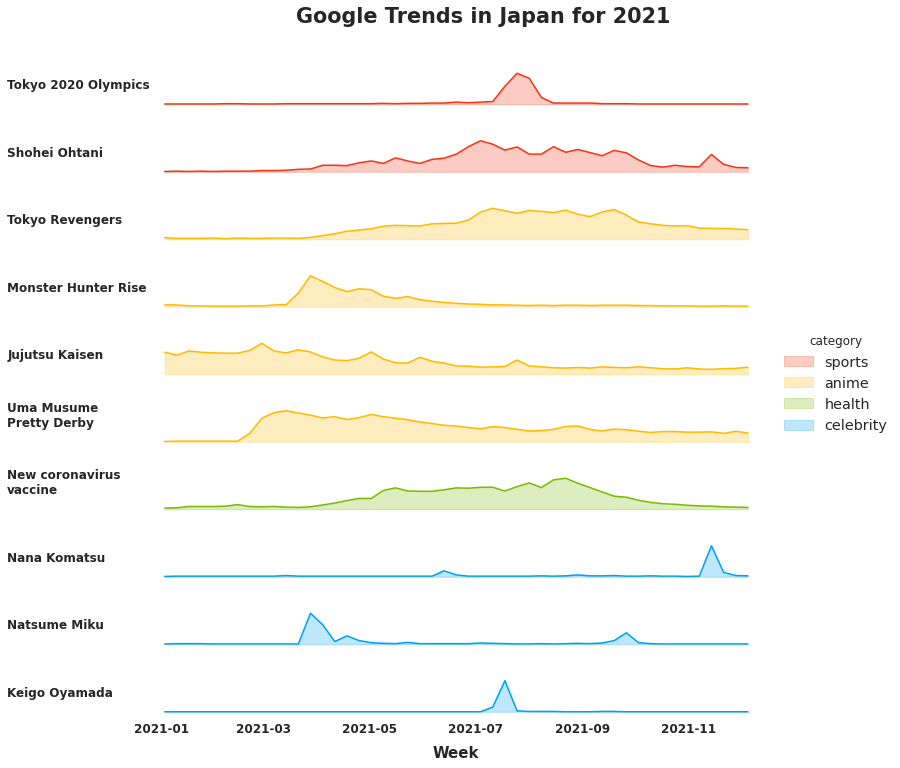

In [259]:
# Creates a FacetGrid where each row is a different trend (i.e. search term).
# The color of each trend is based on its category (e.g. sports)
g = sns.FacetGrid(df, row="trend", hue="category", aspect=10, height=1, palette=pal)
g.map(plt.plot, "time", "value")
g.map(plt.fill_between, "time", "value", alpha=0.25)

# Adds custom subtitles for each trend
for i, ax in enumerate(g.axes.flat):
    ax.text(-0.2, 0.5, subtitle_dict[i+1],
            fontweight='bold', fontsize=12,
            transform=ax.transAxes)
    
g.set_titles("")
g.set(yticks=[], ylabel="")

g.set_xticklabels(fontsize=12, fontweight='bold')
plt.xlabel('Week', labelpad=10, fontweight='bold', fontsize=15)

g.add_legend(fontsize="large")
g.despine(bottom=True, left=True)
plt.suptitle("Google Trends in Japan for 2021", y=1.05, fontsize="xx-large", fontweight="bold")
plt.savefig('visualization.png')